# Treehouse Quant Test

## Question 1

In [2]:
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.nasdaq_trader as nasdaq
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [3]:
employee_df = pd.DataFrame({
    "Name":["John","Mike","Sally","Jane","Joe","Dan","Phil"],
    "Salary":[300,200,550,500,600,600,550],
    "manager_id":[3,3,4,7,7,3,0]
},columns=["Name","Salary","manager_id"])

In [10]:
employee_df.index += 1 

In [22]:
def richer_peeps(x):
    x_sal = x["Salary"]
    x_manager_id = x["manager_id"]
    if x_manager_id == 0:
        return False
    manager_sal = employee_df.at[x_manager_id,"Salary"]
#     print(f"x_sal: manager:{x_sal} {manager_sal}")
    if x_sal > manager_sal:
        return True
    return False
names = employee_df[employee_df.apply(richer_peeps,axis=1)]["Name"]

In [23]:
# answer to 1a.
print(names)

3    Sally
5      Joe
6      Dan
Name: Name, dtype: object


In [32]:
manager_set = set(employee_df["manager_id"].unique())

non_managers = employee_df[~employee_df.index.isin(manager_set)]

In [33]:
manager_set

{0, 3, 4, 7}

In [34]:
non_managers

,Name,Salary,manager_id
1,John,300,3
2,Mike,200,3
5,Joe,600,7
6,Dan,600,3


In [35]:
# answer to 1b

print(non_managers["Salary"].sum() / len(non_managers.index))

425.0


# Question 2

In [4]:
def exists():
    try:
        v
        return True
    except NameError:
        return False
        
    if 'v' in locals() or 'v' in globals():
        return True
    return False
# v = 1
# del v
print(exists())


False


# Question 3

In [22]:
def print_list(x):
    for i in x:
        print(i, end =" ")
    print("")

def pascal(N):
    if N == 1:
        print_list([1])
        return [1]
    if N == 2:
        pascal(1)
        ans = [1,1]
        print_list(ans)
        return ans
    returned = pascal(N - 1)
#     print(returned)
    toRet=[]
    toRet.append(1)
    for i in range(1,len(returned)):
        toRet.append(returned[i] + returned[i - 1])
    toRet.append(1)
    print_list(toRet)
    return toRet
ans = pascal(12)
# print(ans)

1 
1 1 
1 2 1 
1 3 3 1 
1 4 6 4 1 
1 5 10 10 5 1 
1 6 15 20 15 6 1 
1 7 21 35 35 21 7 1 
1 8 28 56 70 56 28 8 1 
1 9 36 84 126 126 84 36 9 1 
1 10 45 120 210 252 210 120 45 10 1 
1 11 55 165 330 462 462 330 165 55 11 1 


# Question 4

In [ ]:
"""
Resources:
https://levelup.gitconnected.com/value-at-risk-with-python-d87cf6c41ed1 
"""

In [13]:
from scipy.stats import norm

In [5]:
confidence_interval = 0.95

In [4]:
start_day = datetime(2016, 1, 1)
end_day = datetime(2016, 12, 31)
num_of_days = (end_day - start_day).days
print(num_of_days)

365


In [5]:
# tickers = ['AAPL.O','IBM.N','GOOG.O','BP.N','XOM.N','COST.O','GS.N'] 
tickers = ['AAPL','IBM','GOOG','BP','XOM','COST','GS'] 
data = pdr.get_data_yahoo(tickers, 
                 start=start_day, 
                 end=end_day)#datetime.today().strftime('%Y-%m-%d'))

In [6]:
weights = np.array([.15, .2, .2, .15,0.10,0.15,0.05])

In [7]:
closes = data['Adj Close']
returns = closes.pct_change().dropna()

In [8]:
avg_rets = returns.mean()
port_mean = avg_rets.dot(weights)
port_stdev = returns.std().dot(weights)
print(port_mean, port_stdev)

0.000633304060119479 0.0137001493248745


In [14]:
Var95 = np.percentile(returns.dot(weights), (1-confidence_interval) * 100)
tail_loss = norm.expect(lambda x: x, loc = port_mean, scale = port_stdev, ub = Var95)
CVaR95 = ((1 / (1 - confidence_interval)) * tail_loss) #+ Var95

In [15]:
Var95

-0.014168695683355229

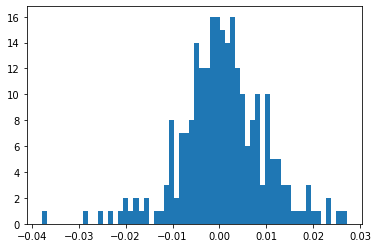

In [16]:
overall_returns = sorted(returns.dot(weights))
plt.hist(overall_returns, bins = 180//3)

plt.show()

In [17]:
# answer 4a
print(-Var95)
print(-CVaR95)

0.014168695683355229
0.05920671377488237


In [22]:
cov_matrix = returns.cov()
annulaised_cov_mat = cov_matrix * 247 #https://www1.nseindia.com/products/content/equities/equities/historical_equity_businessgrowth.htm
print(cov_matrix)

Symbols      AAPL       IBM      GOOG        BP       XOM      COST        GS
Symbols                                                                      
AAPL     0.000216  0.000055  0.000088  0.000078  0.000048  0.000052  0.000089
IBM      0.000055  0.000155  0.000054  0.000095  0.000065  0.000025  0.000090
GOOG     0.000088  0.000054  0.000158  0.000049  0.000030  0.000050  0.000067
BP       0.000078  0.000095  0.000049  0.000342  0.000152  0.000027  0.000168
XOM      0.000048  0.000065  0.000030  0.000152  0.000145  0.000022  0.000085
COST     0.000052  0.000025  0.000050  0.000027  0.000022  0.000123  0.000047
GS       0.000089  0.000090  0.000067  0.000168  0.000085  0.000047  0.000286


In [24]:
# Calculate mean returns for each stock
avg_rets = returns.mean()

 # https://en.wikipedia.org/wiki/Dot_product#:~:targetText=In%20mathematics%2C%20the%20dot%20product,and%20returns%20a%20single%20number.
port_mean = avg_rets.dot(weights)
print(f"port_mean: {port_mean}")
#Calculate portfolio variance
port_var = weights.T@annulaised_cov_mat@weights
print(f"port_var: {port_var}")

#Calculate portfolio voltaility(risk)/standard deviation
port_volatility = np.sqrt(port_var)
print(f"port_volatility: {port_volatility}")
# Calculate portfolio standard deviation
# port_stdev = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

# print(f"port_stdev: {port_stdev}")

port_mean: 0.0006333044497002457
port_var: 0.020286154017341906
port_volatility: 0.14242947032598943


In [171]:

VaR_95 = norm.ppf(1-confidence_interval, port_mean, port_stdev)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc = port_mean, scale = port_stdev,lb=-1, ub = VaR_95)
CVaR_95 = (1 / (1 - confidence_interval)) * tail_loss

In [173]:
# answer 4b
print(-VaR_95)
print(-CVaR_95)

0.02188794211826274
0.027611737634419518


In [174]:
# https://blog.cidirectinvesting.com/finance-101-leveraging-and-short-selling/#:~:text=Conclusion,lender%20while%20pocketing%20a%20profit.

# Info

GS: Goldman sachs

Aapl: Apple

IBM: IBM haha

GOOL: google

BP: british power (oily)

XOM: Exxon Mobil (oily)

COST: Costco Wholesale Corporation, membership only big box retail stores 

(Walmart uses a traditional big-box retail model while Costco uses a membership-based model.)



## Assumptions

1. Portfolio manager's credit is good enough for max 4 months shorting?


In [226]:
my_capital = 1000000
initial_investment = np.array([my_capital * weights])


In [227]:
initial_investment

array([[150000., 200000., 200000., 150000., 100000., 150000.,  50000.]])

In [228]:

for i in range(len(returns)): #len(returns)
    cur_position = initial_investment[i] + (returns.iloc[i] * initial_investment[i]).values
#     print(cur_position)
#     print(len(initial_investment))
    initial_investment = np.vstack((initial_investment, cur_position))

In [229]:
initial_investment.shape

(253, 7)

In [230]:
positions_df = pd.DataFrame(initial_investment, columns=tickers)

In [236]:
positions_df

,AAPL,IBM,GOOG,BP,XOM,COST,GS,total
0,150000.000000,200000.000000,200000.000000,150000.000000,100000.000000,150000.000000,50000.000000,1.000000e+06
1,150128.252196,197573.062565,195509.177230,149040.301518,99371.396991,148179.557436,49142.762898,9.889445e+05
2,146366.136603,197427.704054,195704.198902,148416.523728,100218.124757,148541.821781,48296.611810,9.849711e+05
3,143501.786384,196439.496356,195978.281239,145393.452664,99384.226698,147167.192382,47117.575210,9.749820e+05
4,137445.347388,193082.409826,191437.384033,141218.791835,97793.468034,143795.677129,45669.423495,9.504425e+05
...,...,...,...,...,...,...,...,...
248,169740.365067,251507.975297,208177.832612,191558.025249,120479.804725,152267.411892,67889.781361,1.161621e+06
249,170818.358901,252156.629512,208610.052367,192023.720339,120532.952609,152239.230424,68055.996483,1.164437e+06
250,170089.970966,250723.396716,206897.001566,192748.143890,119935.246166,151262.192566,67799.610103,1.159456e+06
251,170046.295320,251341.931327,206301.384406,193524.329270,120001.644834,151374.902382,67103.730364,1.159694e+06


In [235]:
def sum_portfolio(x):
    return x.sum()
positions_df['total'] = positions_df.apply(sum_portfolio,axis=1)

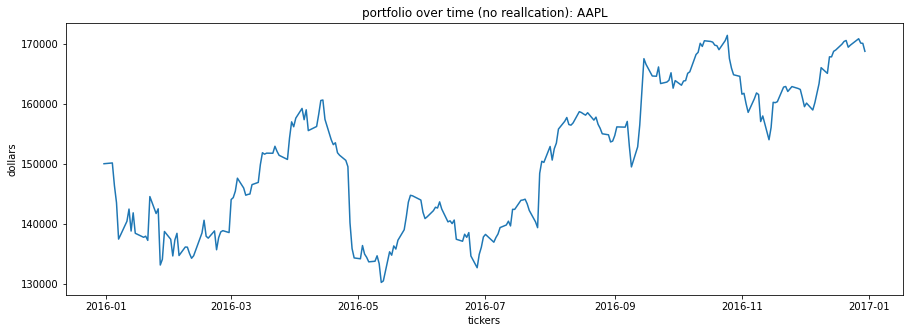

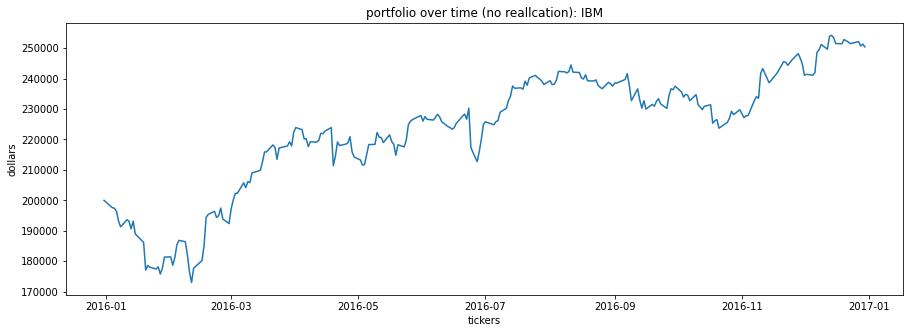

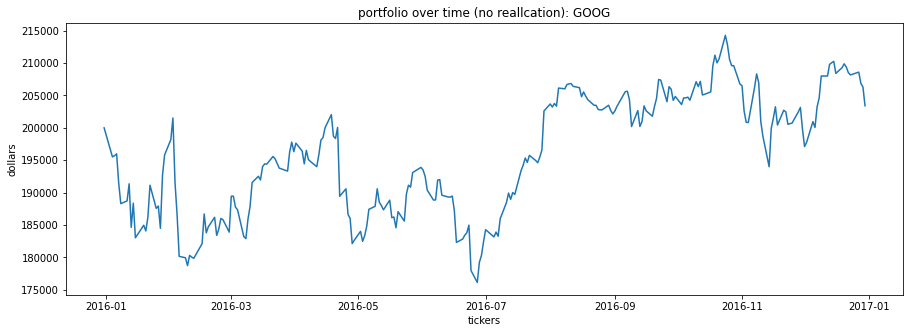

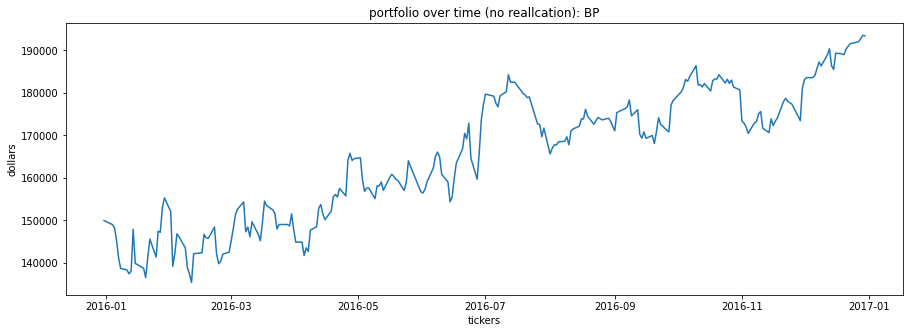

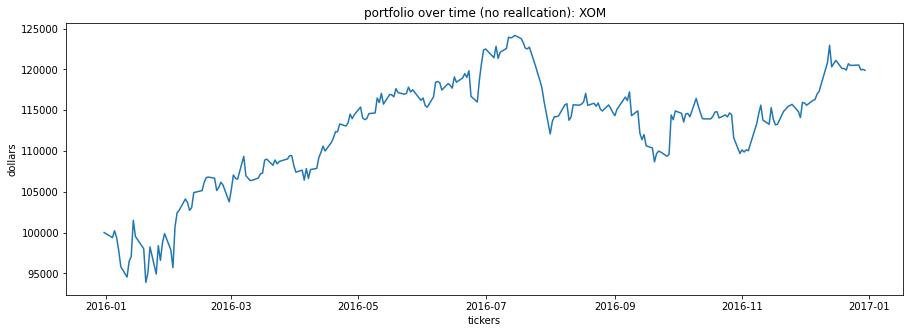

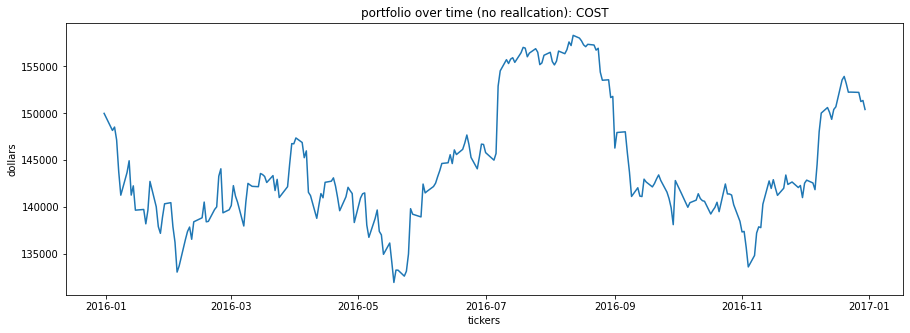

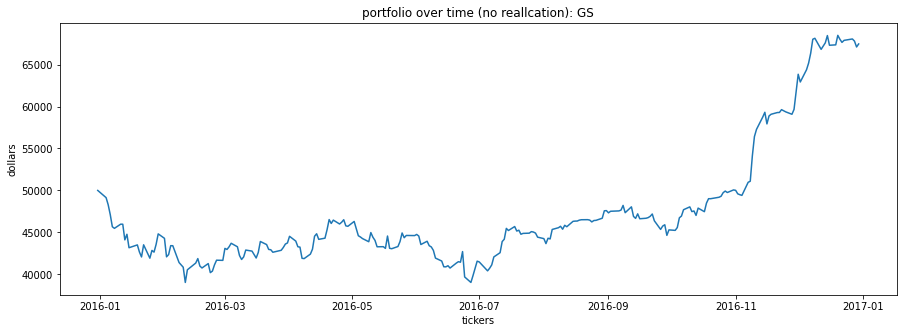

In [266]:

for col in tickers:
    plt.figure(figsize = (15,5))
    plt.title('portfolio over time (no reallcation): {}'.format(col))
    plt.xlabel('tickers')
    plt.ylabel('dollars')
    plt.plot(data.index,positions_df.loc[:,col])
    plt.show()

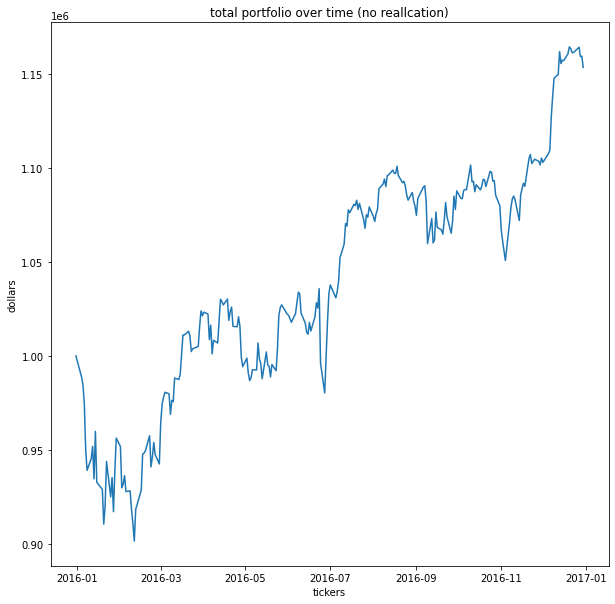

In [238]:
plt.figure(figsize = (10,10))
plt.title('total portfolio over time (no reallcation)')
plt.xlabel('tickers')
plt.ylabel('dollars')
plt.plot(data.index,positions_df['total'])
plt.show()

In [260]:
def overall_sharpe_ratio(portfolio):
#     print(portfolio)
    pct_return = portfolio[len(portfolio)-1] - portfolio[0]
    std = portfolio.std()
    SR = pct_return / std
    return SR
def avg_daily_sharpe_ratio(data,weights):
#     print(portfolio)
    print(data.head())
    log_return = np.sum(np.log(data/data.shift())*weights, axis=1)
    mean = log_return.mean()
    std = log_return.std()
    SR = mean / std
    return SR
overall_sharpe = get_sharpe_ratio(positions_df['total'])
daily_sharpe = avg_daily_sharpe_ratio(data['Adj Close'], weights)

0      1.000000e+06
1      9.889445e+05
2      9.849711e+05
3      9.749820e+05
4      9.504425e+05
           ...     
248    1.161621e+06
249    1.164437e+06
250    1.159456e+06
251    1.159694e+06
252    1.153734e+06
Name: total, Length: 253, dtype: float64
Symbols          AAPL         IBM        GOOG         BP        XOM  \
Date                                                                  
2015-12-31  24.230721  100.764046  758.880005  21.274513  57.979965   
2016-01-04  24.251438   99.541306  741.840027  21.138399  57.615501   
2016-01-05  23.643713   99.468071  742.580017  21.049929  58.106434   
2016-01-06  23.181011   98.970192  743.619995  20.621166  57.622940   
2016-01-07  22.202665   97.278824  726.390015  20.029074  56.700619   

Symbols           COST          GS  
Date                                
2015-12-31  142.536087  162.552826  
2016-01-04  140.806229  159.765900  
2016-01-05  141.150467  157.015015  
2016-01-06  139.844238  153.181900  
2016-01-07  136.640

In [261]:
print(overall_sharpe)
print(daily_sharpe)

2.471008776064093
0.06004062764028922


In [295]:
#https://stackoverflow.com/questions/40014258/momentum-portfoliotrend-following-quant-simulation-on-pandas
def get_technical_indicators(dataset, ticker, to_prefix = True):
    return_df = pd.DataFrame(columns=['ma7','ma21','26ema','12ema','ema','MACD','20sd','upper_band','lower_band'
                                         'momentum', 'log_momentum'
                                     ])
    
    print(dataset.head(10))
    
    # Create 7 and 21 days Moving Average
    prefix = ("{}_".format(ticker) if to_prefix else "")
    print(f"prefix: {prefix}")
    ma7_col = prefix + 'ma7'
    ma21_col = prefix + 'ma21'
    _26ema_col = prefix + '26ema'
    _12ema_col = prefix + '12ema'
    MACD_col = prefix + 'MACD'
    _20sd_col = prefix + '20sd'
    upper_band_col = prefix + 'upper_band'
    lower_band_col = prefix + 'lower_band'
    ema_col = prefix + 'ema'
    momentum_col = prefix + 'momentum'
    log_momentum_col = prefix + 'log_momentum'
    
    dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
    dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
    
    # Create MACD
    dataset[_26ema_col] = dataset[ticker].ewm(span=26, adjust=True).mean()
    dataset[_12ema_col] = dataset[ticker].ewm(span=12, adjust=True).mean()
    print(dataset[_12ema_col].iloc[0])
    dataset[MACD_col] = (dataset[_12ema_col]-dataset[_26ema_col])

    # Create Bollinger Bands
    dataset[_20sd_col] = dataset[ticker].rolling(20).std()
    dataset[upper_band_col] = dataset[ma21_col] + (dataset[_20sd_col]*2)
    dataset[lower_band_col] = dataset[ma21_col] - (dataset[_20sd_col]*2)
    
    # Create Exponential moving average
    dataset[ema_col] = dataset[ticker].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset[momentum_col] = dataset[ticker].diff(1)   #dataset[priceCol]-1
    dataset[log_momentum_col] = dataset[ticker].pct_change(1)    #np.log(dataset['momentum'])#dataset['momentum'].apply(lambda x: )
    
    return dataset


In [320]:
def plot_technical_indicators(stocks, last_days = 0, tickers=[], to_prefix=False):
#     print(tickers)
    for ticker in tickers:
        dataset = stocks#[[ticker]]
#         print(dataset.head())
        plt.figure(figsize=(16, 10), dpi=100)

        prefix = ("{}_".format(ticker) if to_prefix else "")
        ma7_col = prefix + 'ma7'
        ma21_col = prefix + 'ma21'
        _26ema_col = prefix + '26ema'
        _12ema_col = prefix + '12ema'
        MACD_col = prefix + 'MACD'
        _20sd_col = prefix + '20sd'
        upper_band_col = prefix + 'upper_band'
        lower_band_col = prefix + 'lower_band'
        ema_col = prefix + 'ema'
        momentum_col = prefix + 'momentum'
        log_momentum_col = prefix + 'log_momentum'

        dataset = dataset.iloc[-last_days:, :]
        shape_0 = dataset.shape[0]
        shape_0 = dataset.index[shape_0 - 1] 
        xmacd_ = dataset.index[0]    #shape_0-last_days
        print(f"xmacd_:{xmacd_}")
        x_ = range(3, dataset.shape[0])
        x_ =list(dataset.index)

        # Plot first subplot
        plt.subplot(2, 1, 1)
        plt.plot(dataset[ma7_col],label='MA 7', color='g',linestyle='--')
        plt.plot(dataset[ticker],label='Closing Price', color='b')
        plt.plot(dataset[ma21_col],label='MA 21', color='r',linestyle='--')
        plt.plot(dataset[ema_col],label='EMA', color='b',linestyle='-.')
        plt.plot(dataset[upper_band_col],label='Upper Band', color='c')
        plt.plot(dataset[lower_band_col],label='Lower Band', color='c')
        plt.fill_between(x_, dataset[lower_band_col], dataset[upper_band_col], alpha=0.35)
        plt.title('Technical indicators for {} - last {} days.'.format(ticker, last_days))
        plt.ylabel('USD')
        plt.legend()

        # Plot second subplot
        plt.subplot(2, 1, 2)
        plt.title('MACD')
        plt.plot(dataset[MACD_col],label='MACD', linestyle='-.')
        plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
        plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
        plt.plot(dataset[momentum_col],label='Momentum', color='b',linestyle='-') #log_momentum

        plt.legend()
        plt.show()

In [26]:
close = data['Adj Close']
close.head()

Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS
Date,,,,,,,
2015-12-31,102.161163,105.399178,758.880005,21.278278,57.979977,142.536087,162.552795
2016-01-04,102.248528,104.120193,741.840027,21.142143,57.615498,140.806229,159.765884
2016-01-05,99.686234,104.043617,742.580017,21.053648,58.106415,141.150436,157.014999
2016-01-06,97.735428,103.522827,743.619995,20.624817,57.622952,139.844223,153.181839
2016-01-07,93.610542,101.753662,726.390015,20.032619,56.700615,136.640472,148.473862


In [303]:
close.columns

Index(['AAPL', 'IBM', 'GOOG', 'BP', 'XOM', 'COST', 'GS'], dtype='object', name='Symbols')

In [304]:
for ticker in tickers:
    print(close)
    dataset_TI_df = get_technical_indicators(close[[ticker]], ticker=ticker, to_prefix=True)   #data[[('Close', 'AMD')]]
    
    close = pd.concat([close,dataset_TI_df], axis=1)
# dataset_TI_df.columns = dataset_TI_df.columns.get_level_values(0)

Symbols          AAPL         IBM        GOOG         BP        XOM        COST          GS
Date                                                                                       
2015-12-31  24.230721  100.764046  758.880005  21.274513  57.979965  142.536087  162.552826
2016-01-04  24.251438   99.541306  741.840027  21.138399  57.615501  140.806229  159.765900
2016-01-05  23.643713   99.468071  742.580017  21.049929  58.106434  141.150467  157.015015
2016-01-06  23.181011   98.970192  743.619995  20.621166  57.622940  139.844238  153.181900
2016-01-07  22.202665   97.278824  726.390015  20.029074  56.700619  136.640488  148.473877
2016-01-08  22.320063   96.378242  714.469971  19.675182  55.555164  134.248734  147.860565
2016-01-11  22.681480   97.549728  716.030029  19.627539  54.811356  136.552261  149.474960
2016-01-12  23.010666   97.308105  726.070007  19.498232  55.934498  137.734879  149.456955
2016-01-13  22.419050   96.041412  700.559998  19.579905  56.269192  134.257507 

C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Symbols          AAPL         IBM        GOOG         BP        XOM        COST          GS       AAPL   AAPL_ma7  AAPL_ma21  AAPL_26ema  AAPL_12ema  AAPL_MACD  AAPL_20sd  AAPL_upper_band  AAPL_lower_band   AAPL_ema  AAPL_momentum  AAPL_log_momentum         IBM     IBM_ma7    IBM_ma21   IBM_26ema   IBM_12ema  IBM_MACD  IBM_20sd  IBM_upper_band  IBM_lower_band     IBM_ema  IBM_momentum  IBM_log_momentum        GOOG    GOOG_ma7   GOOG_ma21  GOOG_26ema  GOOG_12ema  GOOG_MACD  GOOG_20sd  GOOG_upper_band  GOOG_lower_band    GOOG_ema  GOOG_momentum  GOOG_log_momentum
Date                                                                                                                                                                                                                                                                                                                                                                                                                                            

C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Symbols          AAPL         IBM        GOOG         BP        XOM        COST          GS       AAPL   AAPL_ma7  AAPL_ma21  AAPL_26ema  AAPL_12ema  AAPL_MACD  AAPL_20sd  AAPL_upper_band  AAPL_lower_band   AAPL_ema  AAPL_momentum  AAPL_log_momentum         IBM     IBM_ma7    IBM_ma21   IBM_26ema   IBM_12ema  IBM_MACD  IBM_20sd  IBM_upper_band  IBM_lower_band     IBM_ema  IBM_momentum  IBM_log_momentum        GOOG    GOOG_ma7   GOOG_ma21  GOOG_26ema  GOOG_12ema  GOOG_MACD  GOOG_20sd  GOOG_upper_band  GOOG_lower_band    GOOG_ema  GOOG_momentum  GOOG_log_momentum         BP     BP_ma7    BP_ma21   BP_26ema   BP_12ema   BP_MACD   BP_20sd  BP_upper_band  BP_lower_band     BP_ema  BP_momentum  BP_log_momentum        XOM    XOM_ma7   XOM_ma21  XOM_26ema  XOM_12ema  XOM_MACD  XOM_20sd  XOM_upper_band  XOM_lower_band    XOM_ema  XOM_momentum  XOM_log_momentum
Date                                                                                                                                    

C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

Symbols          AAPL         IBM        GOOG         BP        XOM        COST          GS       AAPL   AAPL_ma7  AAPL_ma21  AAPL_26ema  AAPL_12ema  AAPL_MACD  AAPL_20sd  AAPL_upper_band  AAPL_lower_band   AAPL_ema  AAPL_momentum  AAPL_log_momentum         IBM     IBM_ma7    IBM_ma21   IBM_26ema   IBM_12ema  IBM_MACD  IBM_20sd  IBM_upper_band  IBM_lower_band     IBM_ema  IBM_momentum  IBM_log_momentum        GOOG    GOOG_ma7   GOOG_ma21  GOOG_26ema  GOOG_12ema  GOOG_MACD  GOOG_20sd  GOOG_upper_band  GOOG_lower_band    GOOG_ema  GOOG_momentum  GOOG_log_momentum         BP     BP_ma7    BP_ma21   BP_26ema   BP_12ema   BP_MACD   BP_20sd  BP_upper_band  BP_lower_band     BP_ema  BP_momentum  BP_log_momentum        XOM    XOM_ma7   XOM_ma21  XOM_26ema  XOM_12ema  XOM_MACD  XOM_20sd  XOM_upper_band  XOM_lower_band    XOM_ema  XOM_momentum  XOM_log_momentum        COST    COST_ma7   COST_ma21  COST_26ema  COST_12ema  COST_MACD  COST_20sd  COST_upper_band  COST_lower_band    COST_ema  \
Date 

C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma7_col] = dataset[ticker].rolling(window=7).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[ma21_col] = dataset[ticker].rolling(window=21).mean()
C:\Users\FACEST~1\AppData\Local\Temp/ipykernel_58780/3516295848.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [317]:
close.head(21)


Symbols,AAPL,IBM,GOOG,BP,XOM,COST,GS,AAPL,AAPL_ma7,AAPL_ma21,AAPL_26ema,AAPL_12ema,AAPL_MACD,AAPL_20sd,AAPL_upper_band,AAPL_lower_band,AAPL_ema,AAPL_momentum,AAPL_log_momentum,IBM,IBM_ma7,IBM_ma21,IBM_26ema,IBM_12ema,IBM_MACD,IBM_20sd,IBM_upper_band,IBM_lower_band,IBM_ema,IBM_momentum,IBM_log_momentum,GOOG,GOOG_ma7,GOOG_ma21,GOOG_26ema,GOOG_12ema,GOOG_MACD,GOOG_20sd,GOOG_upper_band,GOOG_lower_band,GOOG_ema,GOOG_momentum,GOOG_log_momentum,BP,BP_ma7,BP_ma21,BP_26ema,BP_12ema,BP_MACD,BP_20sd,BP_upper_band,BP_lower_band,BP_ema,BP_momentum,BP_log_momentum,XOM,XOM_ma7,XOM_ma21,XOM_26ema,XOM_12ema,XOM_MACD,XOM_20sd,XOM_upper_band,XOM_lower_band,XOM_ema,XOM_momentum,XOM_log_momentum,COST,COST_ma7,COST_ma21,COST_26ema,COST_12ema,COST_MACD,COST_20sd,COST_upper_band,COST_lower_band,COST_ema,COST_momentum,COST_log_momentum,GS,GS_ma7,GS_ma21,GS_26ema,GS_12ema,GS_MACD,GS_20sd,GS_upper_band,GS_lower_band,GS_ema,GS_momentum,GS_log_momentum
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-31,24.230721,100.764046,758.880005,21.274513,57.979965,142.536087,162.552826,24.230721,NaN,NaN,24.230721,24.230721,0.000000,NaN,NaN,NaN,24.230721,NaN,NaN,100.764046,NaN,NaN,100.764046,100.764046,0.000000,NaN,NaN,NaN,100.764046,NaN,NaN,758.880005,NaN,NaN,758.880005,758.880005,0.000000,NaN,NaN,NaN,758.880005,NaN,NaN,21.274513,NaN,NaN,21.274513,21.274513,0.000000,NaN,NaN,NaN,21.274513,NaN,NaN,57.979965,NaN,NaN,57.979965,57.979965,0.000000,NaN,NaN,NaN,57.979965,NaN,NaN,142.536087,NaN,NaN,142.536087,142.536087,0.000000,NaN,NaN,NaN,142.536087,NaN,NaN,162.552826,NaN,NaN,162.552826,162.552826,0.000000,NaN,NaN,NaN,162.552826,NaN,NaN
2016-01-04,24.251438,99.541306,741.840027,21.138399,57.615501,140.806229,159.765900,24.251438,NaN,NaN,24.241478,24.241943,0.000465,NaN,NaN,NaN,24.246259,0.020718,0.000855,99.541306,NaN,NaN,100.129161,100.101728,-0.027433,NaN,NaN,NaN,99.846991,-1.222740,-0.012135,741.840027,NaN,NaN,750.032324,749.650017,-0.382307,NaN,NaN,NaN,746.100021,-17.039978,-0.022454,21.138399,NaN,NaN,21.203839,21.200785,-0.003054,NaN,NaN,NaN,21.172428,-0.136114,-0.006398,57.615501,NaN,NaN,57.790724,57.782547,-0.008177,NaN,NaN,NaN,57.706617,-0.364464,-0.006286,140.806229,NaN,NaN,141.637891,141.599080,-0.038811,NaN,NaN,NaN,141.238693,-1.729858,-0.012136,159.765900,NaN,NaN,161.105768,161.043241,-0.062527,NaN,NaN,NaN,160.462631,-2.786926,-0.017145
2016-01-05,23.643713,99.468071,742.580017,21.049929,58.106434,141.150467,157.015015,23.643713,NaN,NaN,24.026707,24.008453,-0.018253,NaN,NaN,NaN,23.829112,-0.607725,-0.025059,99.468071,NaN,NaN,99.891638,99.854412,-0.037226,NaN,NaN,NaN,99.584662,-0.073235,-0.000736,742.580017,NaN,NaN,747.354782,746.890594,-0.464188,NaN,NaN,NaN,743.663095,0.739990,0.000998,21.049929,NaN,NaN,21.148540,21.141906,-0.006635,NaN,NaN,NaN,21.087621,-0.088470,-0.004185,58.106434,NaN,NaN,57.904156,57.908960,0.004805,NaN,NaN,NaN,57.983413,0.490932,0.008521,141.150467,NaN,NaN,141.462764,141.423986,-0.038778,NaN,NaN,NaN,141.177613,0.344238,0.002445,157.015015,NaN,NaN,159.636000,159.471023,-0.164977,NaN,NaN,NaN,158.075820,-2.750885,-0.017218
2016-01-06,23.181011,98.970192,743.619995,20.621166,57.622940,139.844238,153.181900,23.181011,NaN,NaN,23.790287,23.747262,-0.043025,NaN,NaN,NaN,23.391644,-0.462702,-0.019570,98.970192,NaN,NaN,99.634042,99.575298,-0.058744,NaN,NaN,NaN,99.169895,-0.497879,-0.005005,743.619995,NaN,NaN,746.310699,745.858194,-0.452505,NaN,NaN,NaN,743.634003,1.039978,0.001400,20.621166,NaN,NaN,21.001110,20.977529,-0.023581,NaN,NaN,NaN,20.772764,-0.428762,-0.020369,57.622940,NaN,NaN,57.825540,57.818675,-0.006865,NaN,NaN,NaN,57.740094,-0.483494,-0.008321,139.844238,NaN,NaN,141.010295,140.925322,-0.084974,NaN,NaN,NaN,140.277585,-1.306229,-0.009254,153.181900,NaN,NaN,157.831716,157.485793,-0.345923,NaN,NaN,NaN,154.772424,-3.833115,-0.024412
2016-01-07,22.202665,97.278824,726.390015,20.029074,56.700619,136.640488,148.473877,22.202665,NaN,NaN,23.422111,23.327601,-0.094510,NaN,NaN,NaN,22.595716,-0.

xmacd_:2015-12-31 00:00:00


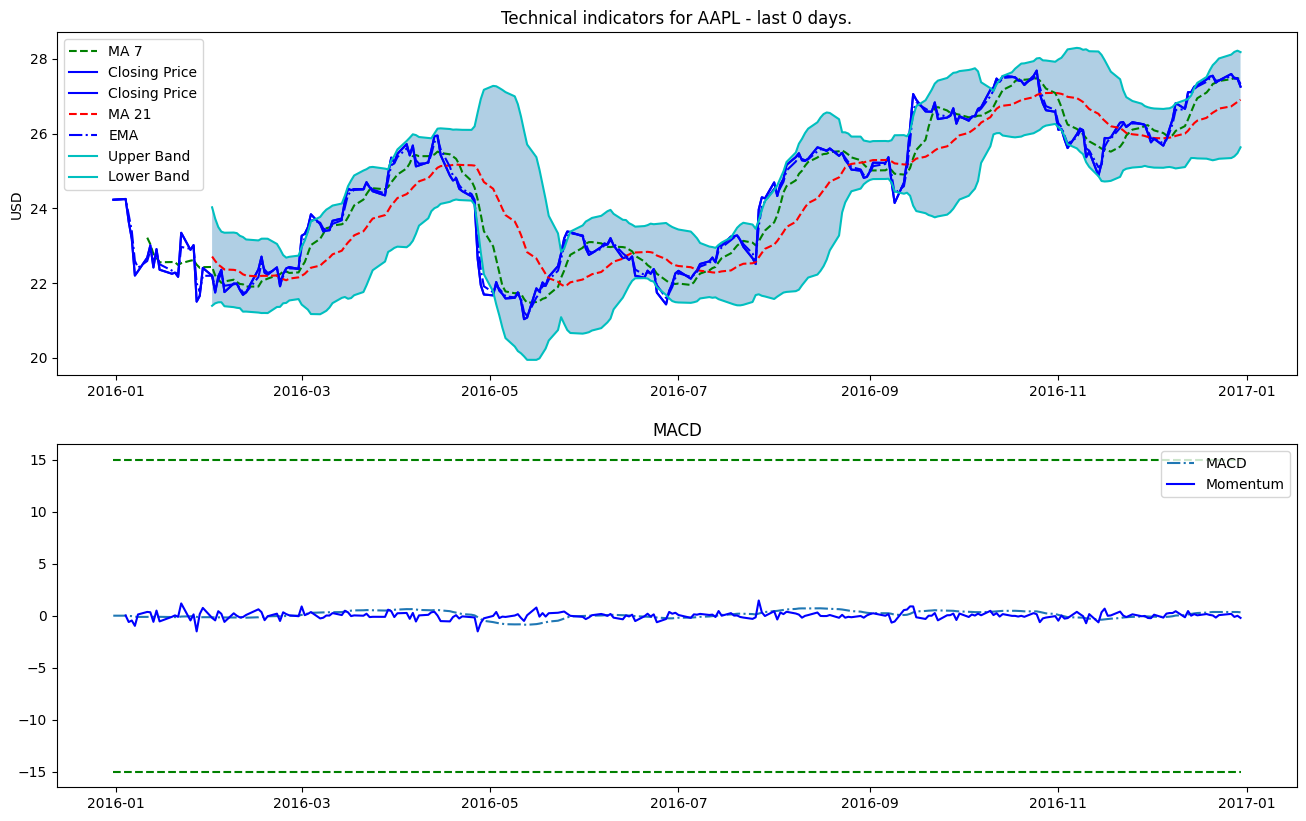

xmacd_:2015-12-31 00:00:00


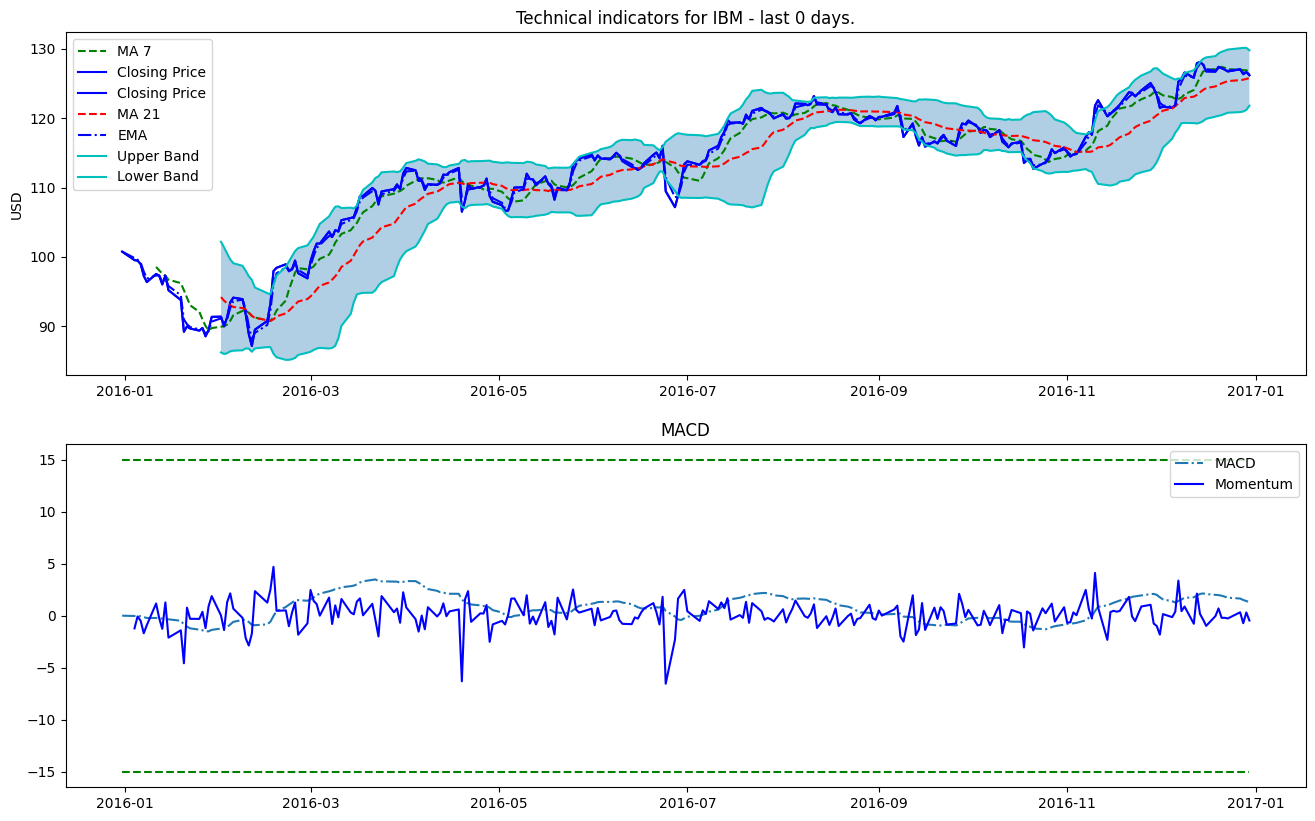

xmacd_:2015-12-31 00:00:00


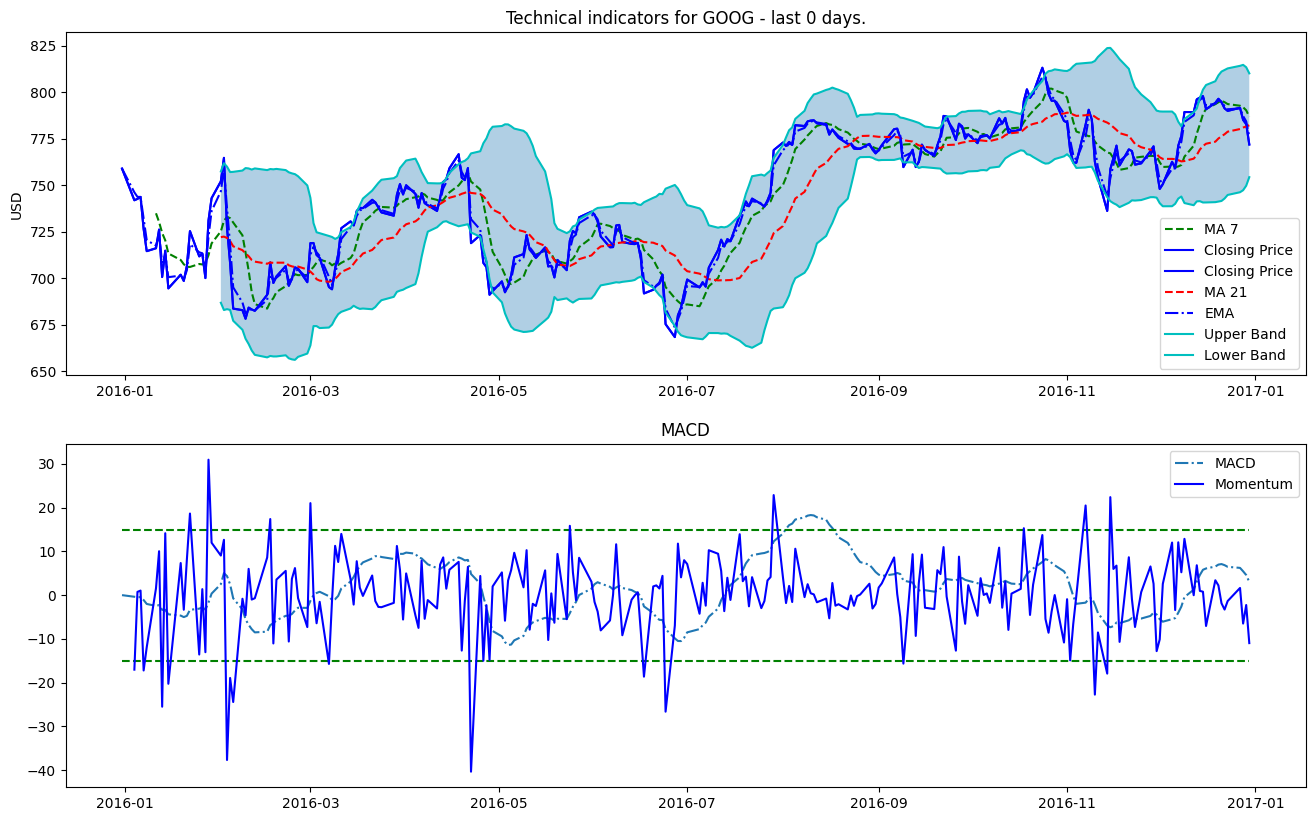

xmacd_:2015-12-31 00:00:00


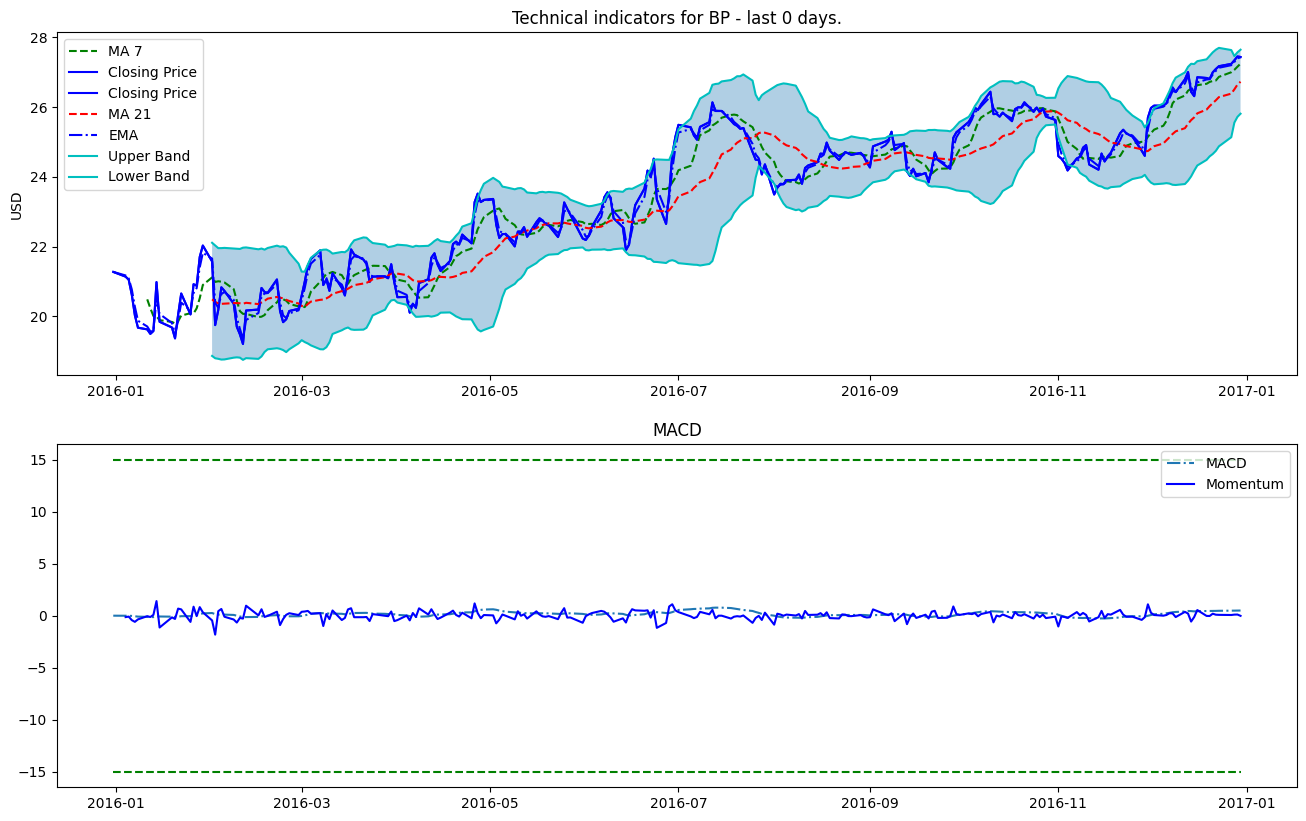

xmacd_:2015-12-31 00:00:00


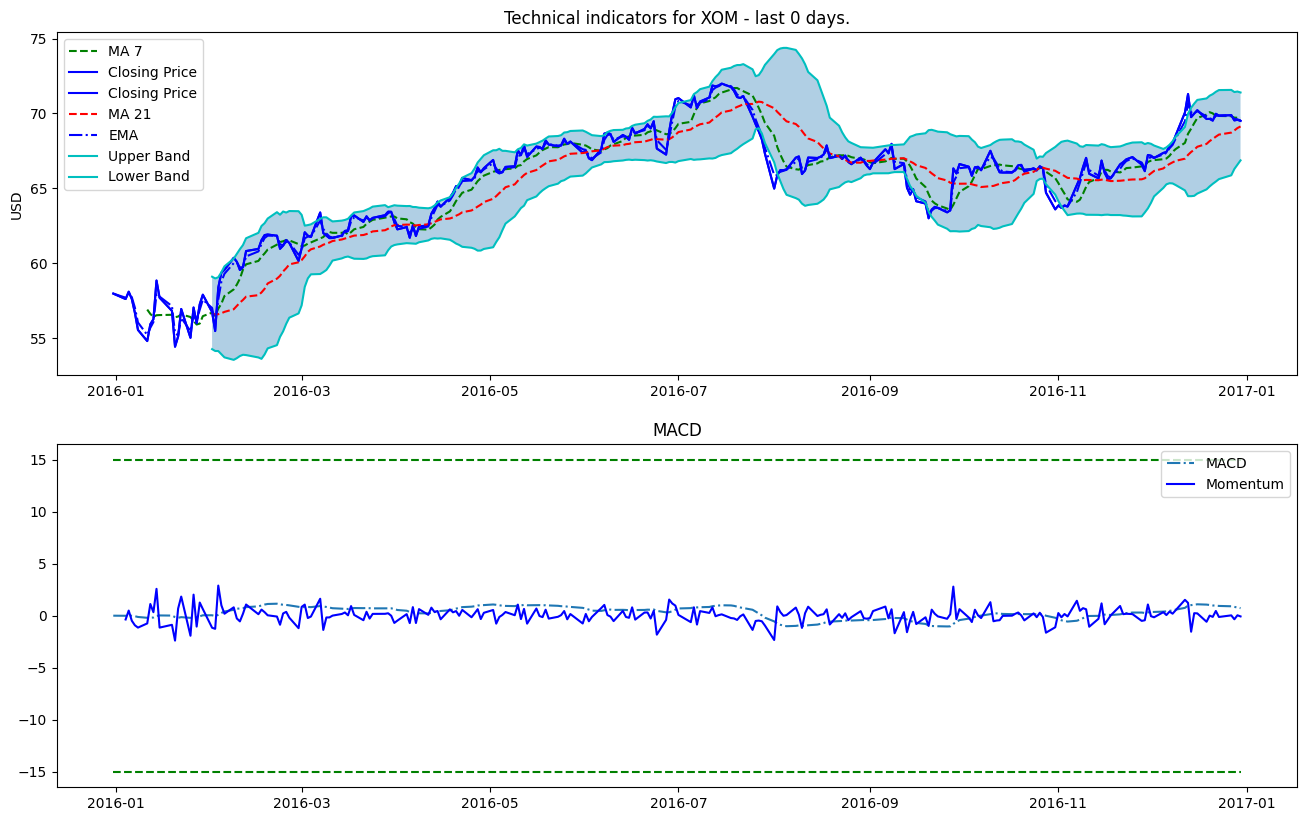

xmacd_:2015-12-31 00:00:00


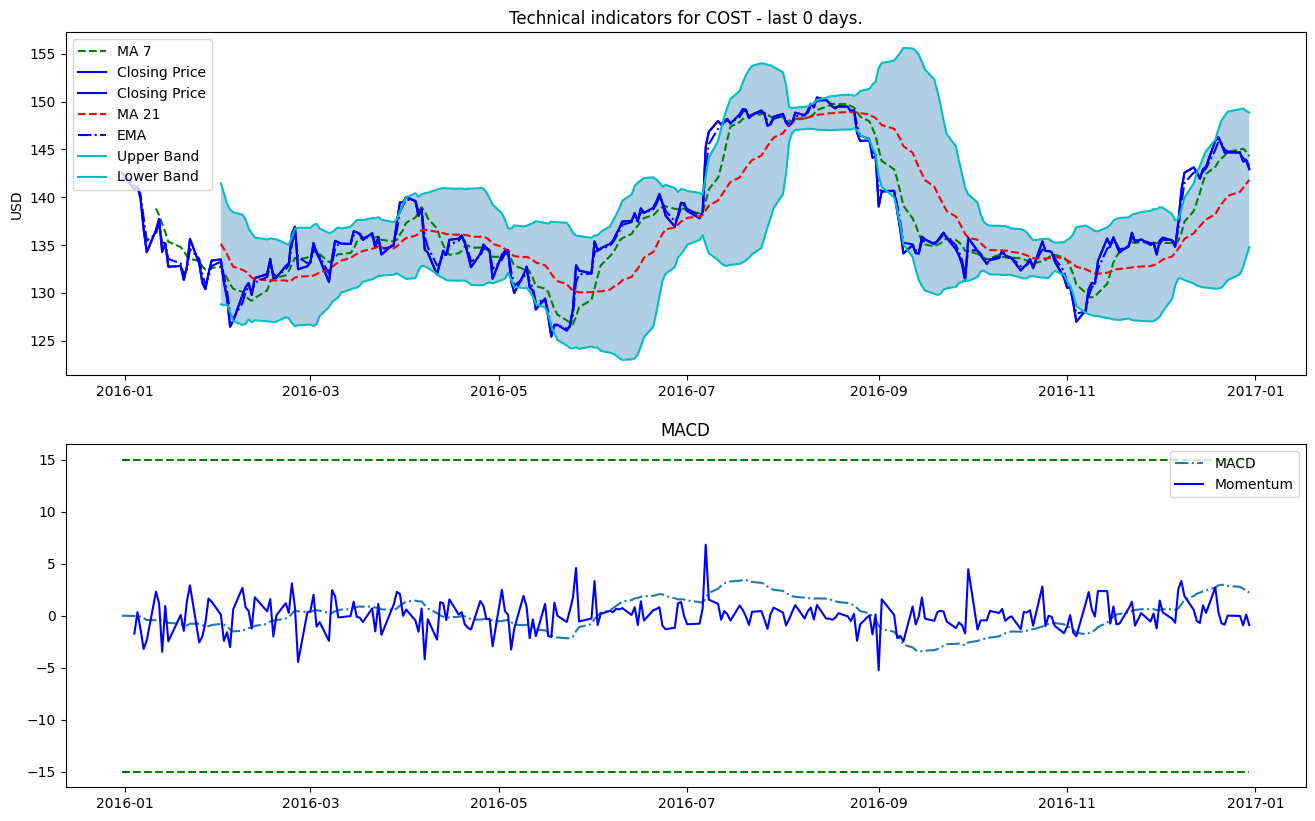

xmacd_:2015-12-31 00:00:00


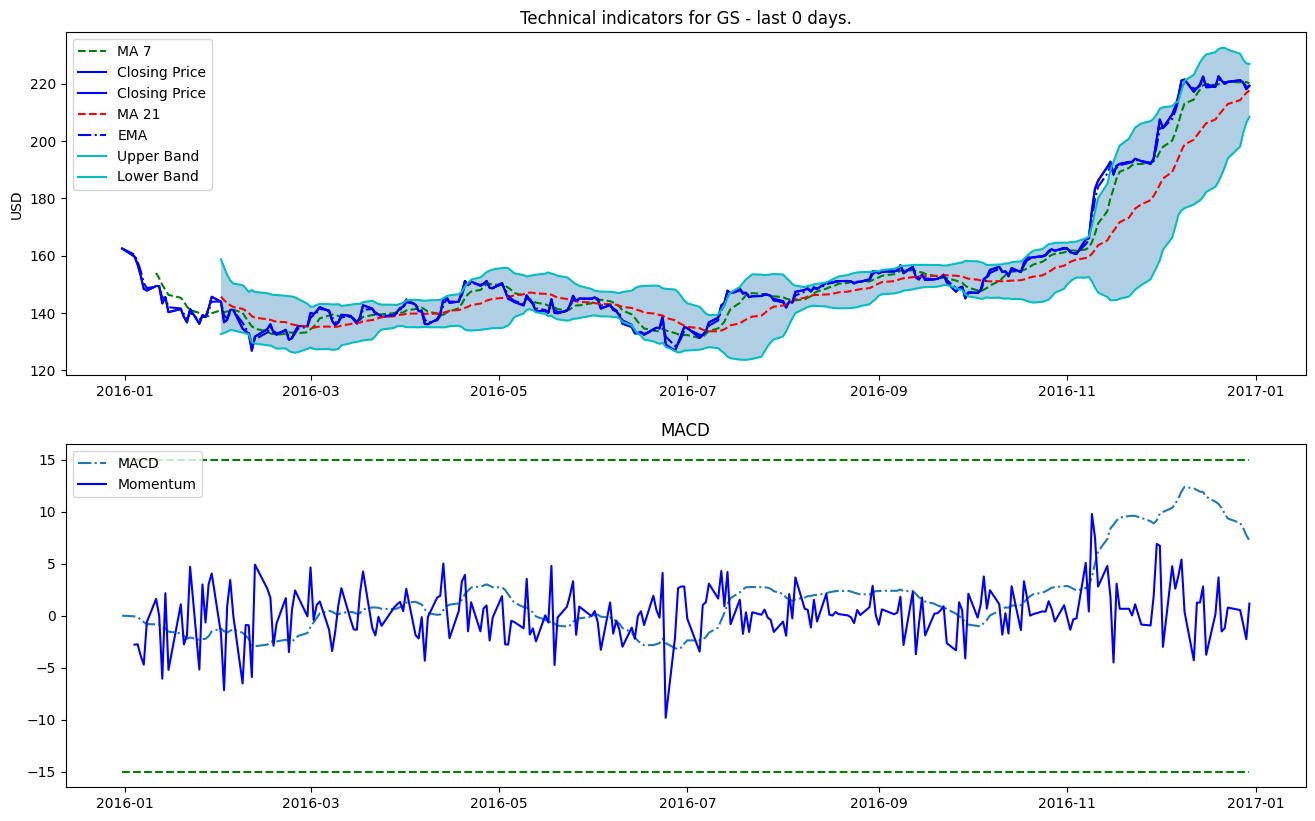

In [321]:
plot_technical_indicators(close, tickers=tickers, to_prefix=True)

## Using Modern Portfolio Theory

In [1]:
port_returns = []
port_vol = []
port_weights = []

num_assets = len(tickers)
num_samples = 10000

#https://stackoverflow.com/questions/17001389/pandas-resample-documentation
indi_rets = close.resample('W').pct_change()#.last().pct_change().mean()

NameError: name 'tickers' is not defined

In [38]:
var_matrix = close.var()

In [34]:
indi_rets.head()

Symbols
AAPL    0.106380
IBM     0.252109
GOOG    0.017051
BP      0.289473
XOM     0.198821
dtype: float64

In [39]:
var_matrix

Symbols
AAPL      56.768561
IBM      106.021739
GOOG    1183.630590
BP         4.573474
XOM       15.114996
COST      37.025260
GS       549.264303
dtype: float64

In [67]:
for idx in range(num_samples):
    cur_weights = np.random.random(num_assets)
    cur_weights = cur_weights/np.sum(cur_weights)
    port_weights.append(cur_weights)
    
    cur_returns = cur_weights @ indi_rets
    port_returns.append(cur_returns)
    
#     print(var)
    cov_matrix = returns.cov()
    annulaised_cov_mat = cov_matrix * 247
    var = cur_weights.T@annulaised_cov_mat@cur_weights
#     var = var_matrix.mul(cur_weights, axis=0)
#     print(var)
#     var = var.mul(cur_weights, axis=1).sum().sum()
    sd = np.sqrt(var)
    ann_sd = sd*np.sqrt(247)
    port_vol.append(ann_sd)

In [68]:
data = {
    'returns': port_returns,
    'volatility':port_vol,
}

In [69]:
for idx, ticker in enumerate(tickers):
    data[ticker+' weight'] = [w[idx] for w in port_weights]
        

In [70]:
for k in data.keys():
    print(len(data[k]))

10000
10000
10000
10000
10000
10000
10000
10000
10000


In [71]:
portfolios_one_year = pd.DataFrame(data)
portfolios_one_year.head()

,returns,volatility,AAPL weight,IBM weight,GOOG weight,BP weight,XOM weight,COST weight,GS weight
0,0.173087,2.381043,0.114489,0.190108,0.153084,0.214603,0.000601,0.190820,0.136295
1,0.113229,2.152952,0.028368,0.308653,0.341140,0.024333,0.053802,0.220143,0.023559
2,0.203022,2.494242,0.100917,0.182521,0.171034,0.178743,0.115147,0.055303,0.196335
3,0.225958,2.650308,0.255787,0.149953,0.037586,0.032648,0.146135,0.029368,0.348523
4,0.153954,2.192731,0.185578,0.226694,0.160755,0.075332,0.236285,0.100307,0.015049


Text(0, 0.5, 'Expected Returns')

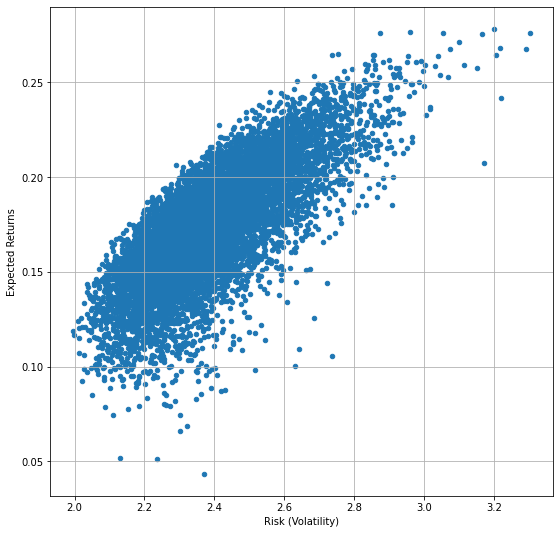

In [72]:
portfolios_one_year.plot.scatter(x='volatility', y='returns',grid=True, figsize=[9,9])
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Returns")

In [75]:
# Min volatility
idx = portfolios_one_year['volatility'].idxmin()
print(f"idx: {idx}")
min_vol_port = portfolios_one_year.iloc[idx]
min_vol_port

idx: 578


returns        0.118844
volatility     1.996504
AAPL weight    0.093902
IBM weight     0.165717
GOOG weight    0.122850
BP weight      0.000547
XOM weight     0.281341
COST weight    0.312683
GS weight      0.022960
Name: 578, dtype: float64

In [76]:
# Best Sharpe Ratio
risk_free = 0.01
idx = ((portfolios_one_year['returns'] - risk_free)/portfolios_one_year['volatility']).idxmax()
best_risky_port = portfolios_one_year.iloc[idx]
best_risky_port

returns        0.264295
volatility     2.734658
AAPL weight    0.014040
IBM weight     0.384418
GOOG weight    0.022356
BP weight      0.100017
XOM weight     0.094944
COST weight    0.047647
GS weight      0.336577
Name: 9791, dtype: float64

Text(0, 0.5, 'Expected Returns')

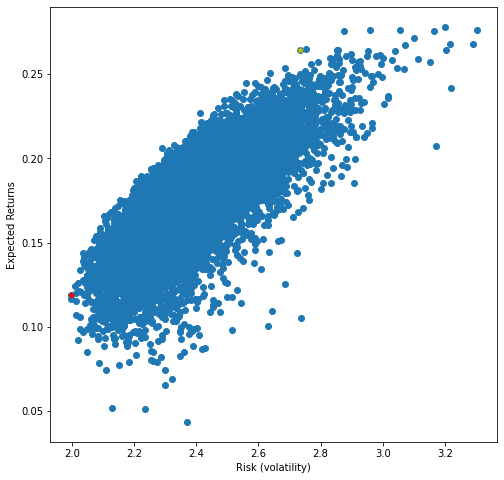

In [78]:
plt.subplots(figsize=(8,8))
plt.scatter(portfolios_one_year['volatility'], portfolios_one_year['returns'])
plt.scatter(min_vol_port[1], min_vol_port[0], marker="*", color='r')
plt.scatter(best_risky_port[1], best_risky_port[0], marker="*", color='y')
plt.xlabel("Risk (volatility)")
plt.ylabel("Expected Returns")

In [79]:
# Max return at risk level, min volatility at return level
# sortino ratio

## Trying DQN

# Question 5

In [86]:
import glob, os

In [93]:
glob.glob("*.py") + glob.glob("*.ipynb")

['BSC AutoBUNNY Withdrawn Event.py',
 'studyEthblocks.ipynb',
 'treehouse Quant Test.ipynb']

In [102]:
root = '.'

def find_py_files(root):
    to_ret = []
    folders = os.listdir(root)
    for fol in folders:
#         print(fol)
        if os.path.isdir(fol):
#             print("is directory")
            inner = find_py_files(os.path.join(root,fol))
            to_ret.extend(inner)
        else:
#             print("is file")
#             print(fol.endswith('.ipynb'))
            if fol.endswith('.py') or fol.endswith('.ipynb'):
                to_ret.append(os.path.join(root,fol))
    return to_ret
python_files = find_py_files(root)
num_of_py_files = len(python_files)


In [103]:
python_files

['.\\.ipynb_checkpoints\\studyEthblocks-checkpoint.ipynb',
 '.\\.ipynb_checkpoints\\treehouse Quant Test-checkpoint.ipynb',
 '.\\BSC AutoBUNNY Withdrawn Event.py',
 '.\\studyEthblocks.ipynb',
 '.\\treehouse Quant Test.ipynb']

In [115]:
import ast

In [119]:
for file in python_files:
    f = open(file,"r")
    content = f.read()
    lines = content.split("\n")
    #num of lines:
    print(f"num of lines: {len(lines)}")
#     tree = ast.parse(content)
#     func_count = sum(isinstance(exp, ast.FunctionDef) for exp in tree.body)
    func_count = 0
    for line in lines:
#         print(line)
        res = line.find("def ")
#         print(res)
        if res != -1:
            func_count += 1
    print(f"func_count: {func_count}")

num of lines: 7
func_count: 0
num of lines: 9494
func_count: 9
num of lines: 646
func_count: 30
num of lines: 4849
func_count: 2
num of lines: 10118
func_count: 10


In [130]:
commit = r'HEAD~3'
!git diff --numstat $commit


2886	245	.ipynb_checkpoints/treehouse Quant Test-checkpoint.ipynb
4223	945	treehouse Quant Test.ipynb


The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [145]:
# def get_folder_size(root, lvl=0,lvl_cap=2):
#     if lvl_cap == lvl:
#         return 
#     folders = os.listdir(root)
#     for fol in folders:
#         cur_fol = os.path.join(root,fol)
#         if os.path.isdir(cur_fol) and not os.path.islink(cur_fol):
#             size = os.stat(cur_fol).st_size#os.path.getsize(cur_fol)
#             print(f"{cur_fol}: {size}")
#             get_folder_size(cur_fol,lvl+1)

def get_directories(root):
    for dirpath, dirnames, filenames in (os.walk(root)):
        lvl = len(dirpath.split('\\'))
        if lvl > 3:
            continue
        print(dirpath, "consumes", end=" ")
        print(sum(os.path.getsize(os.path.join(dirpath, name)) for name in filenames) / 1e6, end=" ")
        print("MB in", len(filenames), "non-directory files")
get_directories('.') 

. consumes 6.455766 MB in 7 non-directory files
.\.git consumes 0.001216 MB in 5 non-directory files
.\.git\hooks consumes 0.023442 MB in 13 non-directory files
.\.git\info consumes 0.00024 MB in 1 non-directory files
.\.git\logs consumes 0.000165 MB in 1 non-directory files
.\.git\objects consumes 0.0 MB in 0 non-directory files
.\.git\refs consumes 0.0 MB in 0 non-directory files
.\.ipynb_checkpoints consumes 3.246944 MB in 2 non-directory files
.\my-python-project consumes 0.0 MB in 0 non-directory files
.\my-python-project\.git consumes 0.0 MB in 0 non-directory files
.\my-python-project\src consumes 0.027538 MB in 1 non-directory files
.\my-python-project\test consumes 0.0 MB in 0 non-directory files


# Question 6

In [167]:
import re

# open the text file and read the data
file = open("BSC AutoBUNNY Withdrawn Event.py",'r')

text = """
The first Apple II was sold on 07-10-1977. The last of the Apple II
models were discontinued on 10/15/1994.Then someone threw an apple through a window on 21 Jan 1990.
Windows was then born in 23 Feb 1991. Windows 11 existed around 19/10/2021.
"""#file.read()
pat1 = "\d{4}[/-]\d{2}[/-]\d{2}"
pat2 = "\d{2}[/-]\d{2}[/-]\d{4}"
# pat3 = "\d{2}[/-]\d{2}[/-]\d{4}"   #Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sept|Oct|Nov|Dec
pat4 = "(\d{2})\s(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sept|Oct|Nov|Dec)\s(\d{4})"
# match a regex pattern for formatted dates
pat = r'{}|{}'.format(pat1,pat2)

matches = [" ".join(m) for m in re.findall(pat4,text)]
matches.extend(re.findall(pat,text))
print(matches)
print(f"number of date appearances: {len(matches)}")

['21 Jan 1990', '23 Feb 1991', '07-10-1977', '10/15/1994', '19/10/2021']
number of date appearances: 5
